### Install Pytorch and YOLOV5

In [1]:
# !pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [2]:
# Run once - Clone repo into directory
# !git clone https://github.com/ultralytics/yolov5

In [3]:
# !cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
# Load pre-trained model for testing
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\dojh1/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-13 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1060 3GB, 3072MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [4]:
# Show model layers - YOLO is a CNN model
# model

### Making Predictions with Pre Trained YOLOv5 Model On Images

In [5]:
# Test out making detections
img = 'https://i.ytimg.com/vi/tJUFXOma_o4/maxresdefault.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 720x1280 1 bottle, 2 cups, 1 spoon, 2 bowls, 1 microwave, 1 clock
Speed: 71.8ms pre-process, 39.0ms inference, 9.0ms NMS per image at shape (1, 3, 384, 640)


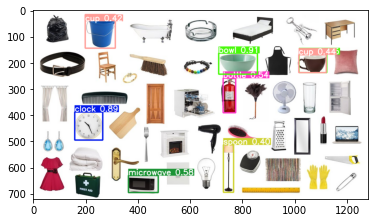

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
# For each object

results.xyxy

[tensor([[7.09771e+02, 1.64447e+02, 8.57543e+02, 2.44941e+02, 9.05568e-01, 4.50000e+01],
         [1.59413e+02, 3.88509e+02, 2.66949e+02, 4.95224e+02, 8.86096e-01, 7.40000e+01],
         [3.64030e+02, 6.30135e+02, 4.78644e+02, 6.95179e+02, 5.80524e-01, 6.80000e+01],
         [7.26243e+02, 2.59738e+02, 7.74762e+02, 3.91857e+02, 5.39921e-01, 3.90000e+01],
         [1.01520e+03, 1.70027e+02, 1.12086e+03, 2.38354e+02, 4.38498e-01, 4.10000e+01],
         [1.99983e+02, 1.74704e+01, 3.14485e+02, 1.45725e+02, 4.17907e-01, 4.10000e+01],
         [7.27869e+02, 5.13022e+02, 7.66161e+02, 6.94104e+02, 4.02363e-01, 4.40000e+01],
         [1.01606e+03, 1.69237e+02, 1.12229e+03, 2.38602e+02, 3.51241e-01, 4.50000e+01]], device='cuda:0')]

In [9]:
results.show()
results.print()

image 1/1: 720x1280 1 bottle, 2 cups, 1 spoon, 2 bowls, 1 microwave, 1 clock
Speed: 71.8ms pre-process, 39.0ms inference, 9.0ms NMS per image at shape (1, 3, 384, 640)


### Making Predictions for Pre Trained YOLOv5 Model on Video

In [10]:
cap = cv2.VideoCapture('./Videos/TrafficTest.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    # Make Detections
    results = model(frame)
    # results.print()
    cv2.imshow('YOLO', np.squeeze(results.render()))
    # Exit loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Train Custom Model

In [13]:
# Run once to clone repo
# !git clone https://github.com/tzutalin/labelImg

In [14]:
# !pip install pyqt5 lxml --upgrade
# !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [15]:
# Train custom model
# !cd yolov5 && python train.py --img 320 --batch 4 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2

### Test Trained Model

In [11]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./TrainedYoloModel/Best3.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\dojh1/.cache\torch\hub\master.zip
YOLOv5  2022-4-13 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1060 3GB, 3072MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [12]:
img = './TestImages/Screenshot 2022-03-20 161952.png'
results = model(img)
results.print()

image 1/1: 771x357 1 bunnylogo, 1 nuslogo
Speed: 10.0ms pre-process, 12.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 320)


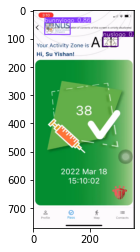

In [13]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [19]:
# Print on bigger window
# results.show()
results.xyxy
print(len(results.xyxy[0]))

2


In [ ]:
cap = cv2.VideoCapture('./Videos/move_01.mp4')
# cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    # Make Detections
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    # Exit loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()